We can use KNeighborsRegressor if we want to make a KNN model for Regression

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
d=load_iris()

In [14]:
dir(d)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
data=pd.DataFrame(d.data,columns=d.feature_names)

In [18]:
data['Target']=d.target

In [19]:
data['Flowers']=data.Target.apply(lambda x:d.target_names[x])

In [20]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flowers
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

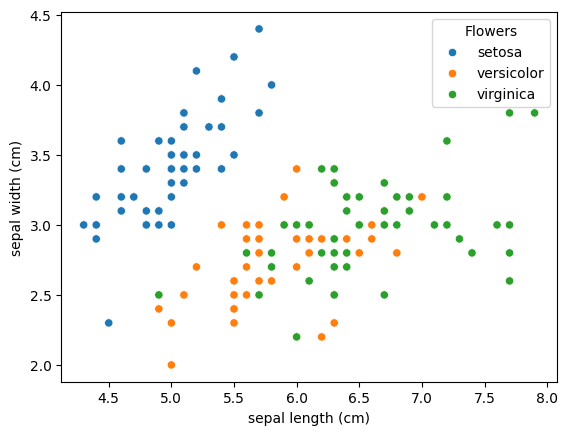

In [21]:
sns.scatterplot(data,x='sepal length (cm)',y='sepal width (cm)',hue='Flowers')

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

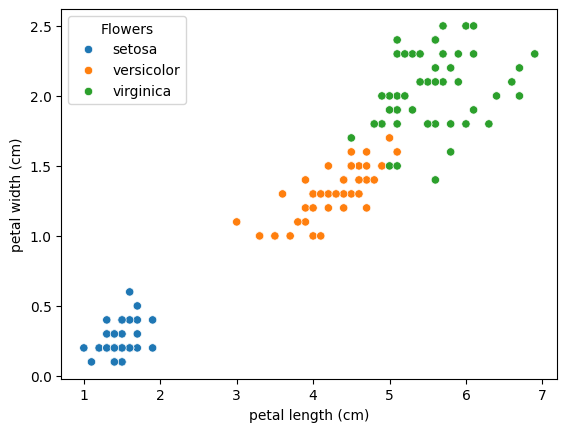

In [22]:
sns.scatterplot(data,x='petal length (cm)',y='petal width (cm)',hue='Flowers')

In [23]:
x=data.drop(['Target','Flowers'],axis=1)
y=data.Target

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
Tx,tx,Ty,ty=train_test_split(x,y,test_size=0.2,random_state=133)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn=KNeighborsClassifier(n_neighbors=5)

In [29]:
knn.fit(Tx,Ty)

KNeighborsClassifier()

In [30]:
knn.score(Tx,Ty)

0.9666666666666667

In [31]:
knn.score(tx,ty)

0.9666666666666667

In [32]:
from sklearn.metrics import confusion_matrix as cf

In [33]:
Y=knn.predict(tx)
cf(ty,Y)

array([[18,  0,  0],
       [ 0,  6,  0],
       [ 0,  1,  5]])

Text(50.722222222222214, 0.5, 'T')

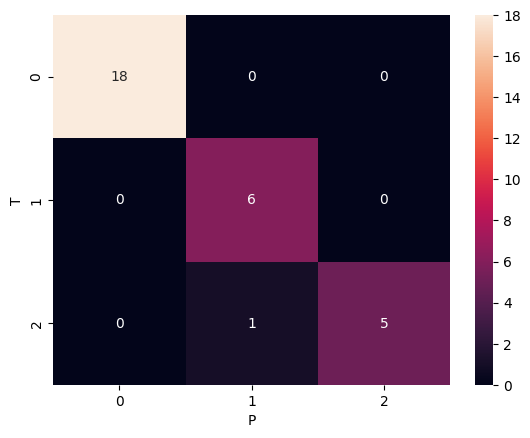

In [37]:
sns.heatmap(cf(ty,Y),annot=True)
plt.xlabel('P')
plt.ylabel('T')

In [38]:
from sklearn.metrics import classification_report as cr

In [40]:
print(cr(ty,Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.86      1.00      0.92         6
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.97      0.97      0.97        30

